# Steps:

1) put all the final bits of code into one .py file

2) make a PDF explaining what I did

In this assignment you will implement a simple workflow that will assess the similarity
between supermarket customers. The workflow will be used to compute, and suggest
for any input customer, a list of his/her 10 most similar other customers. Moreover,
you will be using these results to predict the rating of a customer. To calculate the
(dis)similarity between customers you will first compute the dissimilarity for every
given attribute as discussed in lecture “Measuring Data Similarity”

# 1) Import and pre-process the dataset with customers
Download the groceries.csv dataset from moodle. This dataset contains demographic
characteristics of supermarket 10000 customers along with a list of groceries they
bought. Below is a description of the available attributes:

* Customer ID: The unique id of the customer.
* Age: The age of the customer.
* Sex: Male-Female.
* Marital Status: Married, Single, Divorced.
* Education: Primary, Secondary, Tertiary.
* Annual Income: The annual customer income.
* Customer Rating: The rating of the supermarket from the customer (Poor, Fair, Good, Very Good, Excellent).
* Persons in Household: Number of persons in the household.
* Occupation: The occupation of each customer (retired, housemaid, unemployed, management, entrepreneur, blue-collar, self-employed, services, technician).
* Groceries: A list of the customer groceries.

For any numerical missing values, you should replace them with the average value of
the attribute in the dataset (keeping the integer part of the average).

# Answer 1: Dataframe saved as 'df'

In [1]:
import pandas as pd
import numpy as np  
import random

# for one hot encoding
from sklearn.preprocessing import MultiLabelBinarizer 
mlb = MultiLabelBinarizer(sparse_output=True)

##### import the data and replace all empty numerical values with the average value of the column

In [2]:
df = pd.read_csv('groceries.csv',sep=';')
df['Customer_ID'] = df['Customer_ID'].astype('str')
df['Age'] = df['Age'].replace(' ',None).astype('float64')
df['Age'] = df['Age'].fillna(df['Age'].mean()).astype('int64')

df['Income'] = df['Income'].replace(' ',None).astype('float64')
df['Income'] = df['Income'].fillna(df['Income'].mean()).astype('int64')

df

,Customer_ID,Age,Sex,Marital_Status,Education,Income,Customer_Rating,Persons_in_Household,Occupation,Groceries
0,1,75,male,married,primary,20000,very_good,3,retired,"citrus fruit,semi-finished bread,margarine,rea..."
1,2,61,female,single,secondary,28000,good,1,housemaid,"tropical fruit,yogurt,coffee"
2,3,32,male,single,secondary,34000,very_good,1,blue-collar,whole milk
3,4,62,male,married,primary,31000,very_good,3,blue-collar,"pip fruit,yogurt,cream cheese,meat spreads"
4,5,66,female,married,secondary,19000,good,3,retired,"other vegetables,whole milk,condensed milk,lon..."
...,...,...,...,...,...,...,...,...,...,...
9995,9996,54,male,married,primary,15000,good,3,unemployed,"berries,root vegetables,whole milk,butter,roll..."
9996,9997,73,male,divorced,tertiary,30000,good,1,retired,"meat,other vegetables,whole milk,beverages,rol..."
9997,9998,38,male,married,primary,46000,fair,4,blue-collar,soda
9998,9999,44,female,married,secondary,23000,poor,4,housemaid,"sausage,citrus fruit,tropical fruit,pip fruit,..."


In [3]:
# Here we confirm the data types
df.dtypes

Customer_ID             object
Age                      int64
Sex                     object
Marital_Status          object
Education               object
Income                   int64
Customer_Rating         object
Persons_in_Household     int64
Occupation              object
Groceries               object
dtype: object

In [4]:
# look at all the ages (before and after the changes) to confirm that all values are legitimate
df.Age.unique()

array([75, 61, 32, 62, 66, 55, 23, 26, 29, 57, 28, 40, 53, 68, 33, 79, 54,
       51, 60, 69, 47, 43, 46, 24, 65, 81, 82, 38, 44, 49, 48, 27, 35, 63,
       80, 41, 78, 37, 21, 36, 71, 85, 34, 30, 50, 83, 64, 74, 70, 25, 73,
       58, 76, 42, 67, 22, 52, 56, 84, 31, 45, 77, 86, 72, 39, 59],
      dtype=int64)

In [5]:
# double check for null values, even though this wouldn't really work if the values were just a blank string i.e. ' '
df.isnull().values.any()

False

### MAke all items a list, then One Hot Encode the Groceries items

In [3]:
groc = df['Groceries'].to_list()
groclist = []
for i in range(0,len(groc)):
    item = groc[i].split(sep=',')
    groclist.append(item)
groclist

[['citrus fruit', 'semi-finished bread', 'margarine', 'ready soups'],
 ['tropical fruit', 'yogurt', 'coffee'],
 ['whole milk'],
 ['pip fruit', 'yogurt', 'cream cheese', 'meat spreads'],
 ['other vegetables',
  'whole milk',
  'condensed milk',
  'long life bakery product'],
 ['whole milk', 'butter', 'yogurt', 'rice', 'abrasive cleaner'],
 ['rolls/buns'],
 ['other vegetables',
  'UHT-milk',
  'rolls/buns',
  'bottled beer',
  'liquor (appetizer)'],
 ['potted plants'],
 ['whole milk', 'cereals'],
 ['tropical fruit',
  'other vegetables',
  'white bread',
  'bottled water',
  'chocolate'],
 ['citrus fruit',
  'tropical fruit',
  'whole milk',
  'butter',
  'curd',
  'yogurt',
  'flour',
  'bottled water',
  'dishes'],
 ['beef'],
 ['frankfurter', 'rolls/buns', 'soda'],
 ['chicken', 'tropical fruit'],
 ['butter', 'sugar', 'fruit/vegetable juice', 'newspapers'],
 ['fruit/vegetable juice'],
 ['packaged fruit/vegetables'],
 ['chocolate'],
 ['specialty bar'],
 ['other vegetables'],
 ['butter mi

In [4]:
df['GroceriesList'] = groclist
df

,Customer_ID,Age,Sex,Marital_Status,Education,Income,Customer_Rating,Persons_in_Household,Occupation,Groceries,GroceriesList
0,1,75,male,married,primary,20000,very_good,3,retired,"citrus fruit,semi-finished bread,margarine,rea...","[citrus fruit, semi-finished bread, margarine,..."
1,2,61,female,single,secondary,28000,good,1,housemaid,"tropical fruit,yogurt,coffee","[tropical fruit, yogurt, coffee]"
2,3,32,male,single,secondary,34000,very_good,1,blue-collar,whole milk,[whole milk]
3,4,62,male,married,primary,31000,very_good,3,blue-collar,"pip fruit,yogurt,cream cheese,meat spreads","[pip fruit, yogurt, cream cheese, meat spreads]"
4,5,66,female,married,secondary,19000,good,3,retired,"other vegetables,whole milk,condensed milk,lon...","[other vegetables, whole milk, condensed milk,..."
...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,54,male,married,primary,15000,good,3,unemployed,"berries,root vegetables,whole milk,butter,roll...","[berries, root vegetables, whole milk, butter,..."
9996,9997,73,male,divorced,tertiary,30000,good,1,retired,"meat,other vegetables,whole milk,beverages,rol...","[meat, other vegetables, whole milk, beverages..."
9997,9998,38,male,married,primary,46000,fair,4,blue-collar,soda,[soda]
9998,9999,44,female,married,secondary,23000,poor,4,housemaid,"sausage,citrus fruit,tropical fruit,pip fruit,...","[sausage, citrus fruit, tropical fruit, pip fr..."


In [8]:
hot = df.join(
            pd.DataFrame.sparse.from_spmatrix(
                mlb.fit_transform(df.pop('GroceriesList')),
                index=df.index,
                columns=mlb.classes_))
hot

,Customer_ID,Age,Sex,Marital_Status,Education,Income,Customer_Rating,Persons_in_Household,Occupation,Groceries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1,75,male,married,primary,20000,very_good,3,retired,"citrus fruit,semi-finished bread,margarine,rea...",...,0,0,0,0,0,0,0,0,0,0
1,2,61,female,single,secondary,28000,good,1,housemaid,"tropical fruit,yogurt,coffee",...,0,0,0,0,0,0,0,0,1,0
2,3,32,male,single,secondary,34000,very_good,1,blue-collar,whole milk,...,0,0,0,0,0,0,0,1,0,0
3,4,62,male,married,primary,31000,very_good,3,blue-collar,"pip fruit,yogurt,cream cheese,meat spreads",...,0,0,0,0,0,0,0,0,1,0
4,5,66,female,married,secondary,19000,good,3,retired,"other vegetables,whole milk,condensed milk,lon...",...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,54,male,married,primary,15000,good,3,unemployed,"berries,root vegetables,whole milk,butter,roll...",...,0,0,0,0,0,0,0,1,0,0
9996,9997,73,male,divorced,tertiary,30000,good,1,retired,"meat,other vegetables,whole milk,beverages,rol...",...,0,0,0,0,0,0,0,1,0,0
9997,9998,38,male,married,primary,46000,fair,4,blue-collar,soda,...,0,0,0,0,0,0,0,0,0,0
9998,9999,44,female,married,secondary,23000,poor,4,housemaid,"sausage,citrus fruit,tropical fruit,pip fruit,...",...,0,0,0,0,0,0,0,0,1,0


make one column with a string of the encoded data??  like '0001101001000'  ? does this make sense?

# 2) Compute data (dis-)similarity
To assess the similarity between the customers you could form the dissimilarity matrix
for all given attributes. As described in lecture “Measuring Data Similarity”, for every
given attribute you first distinguish its type (categorical, ordinal, numerical or set) and
then compute the dissimilarity of its values accordingly. For set similarity use the
Jaccard similarity between sets. 

Then, you can calculate the average of the computed
dissimilarities in order to derive the dissimilarity over all attributes. Depending on the
machine used to implement this assignment you should decide whether it is feasible
to compute the dissimilarity matrices, or, have the computations performed on-thefly for a pair of customers. 

https://e-mscba.dmst.aueb.gr/pluginfile.php/6077/mod_resource/content/5/WorkingWithData.pdf

# Answer 2: function called ComboScores will compute the dissimilarity between any two customers

### TEsting / Experimentation Phase
#### Creating the Matrix Creator

In [9]:
a = np.array([1,2,3])
fakearray = np.array([])
for item in a:
    print('We are on item:', item)
    for i in range(0,len(a)):
        print('Does item:', item, ' = ',a[i],'?')

We are on item: 1
Does item: 1  =  1 ?
Does item: 1  =  2 ?
Does item: 1  =  3 ?
We are on item: 2
Does item: 2  =  1 ?
Does item: 2  =  2 ?
Does item: 2  =  3 ?
We are on item: 3
Does item: 3  =  1 ?
Does item: 3  =  2 ?
Does item: 3  =  3 ?


In [10]:
fakelist = ['male','male','female','male']
fakelist[2]

'female'

In [11]:
fakearray = np.zeros( (1,len(fakelist)) )
fakearray[0] = 99
for item in fakelist:
    # fresh 0's array for each item in the list
    temp = np.zeros( (1, len(fakelist)) )
    # then for each item, check it against all items in the list
    for i in range(0,len(fakelist)):
        if item != fakelist[i]:
            temp[0][i] = 1
    fakearray = np.concatenate((fakearray,temp), axis=0)
fakearray = fakearray[fakearray != 99.0]
fakearray = fakearray.reshape(len(fakelist),len(fakelist))
fakearray          

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 1., 0., 1.],
       [0., 0., 1., 0.]])

# Categorical
### simply compare the two, if they are the same you get a 0, different you get a 1

#### Sex

In [5]:
sexl = df['Sex']
sexl

0         male
1       female
2         male
3         male
4       female
         ...  
9995      male
9996      male
9997      male
9998    female
9999      male
Name: Sex, Length: 10000, dtype: object

### Attempted to run a function between all customers
#### Takes too much memory to perform. Maybe take samples of the data? <- but this would defeat the purpose

In [138]:
sexmtx = np.zeros( (1,len(sexl)) ) # to make sure it's the same shape as the ones I'm about to add
sexmtx[0] = 99 # unique identifer so I can drop this later
for item in sexl:
    # fresh 0's array for each item in the list
    temp = np.zeros( (1, len(sexl)) )
    # then for each item, check it against all items in the list
    for i in range(0,len(fakesize)):
        if item != sexl[i]:
            temp[0][i] = 1
    sexmtx = np.concatenate((sexmtx,temp), axis=0)
#sexmtx = np.delete(sexmtx, sexmtx[0])
sexmtx = sexmtx[sexmtx != 99.0]
sexmtx = sexmtx.reshape(len(sexl),len(sexl))
sexmtx   

KeyboardInterrupt: 

In [6]:
# input the index for the customers you'd like to compare, outputs DISSIMILARITY
def SexComparison(a,b):
    if sexl[a] == sexl[b]:
        return 0
    else:
        return 1

In [7]:
SexComparison(0,10)

1

### Marital Status

In [8]:
marrigl = df['Marital_Status']

In [9]:
# input the index for the customers you'd like to compare, outputs DISSIMILARITY
def MarriageComparison(a,b):
    if marrigl[a] == marrigl[b]:
        return 0
    else:
        return 1

In [10]:
MarriageComparison(90,2)

1

### Occupation

In [11]:
occupl = df['Occupation']

In [12]:
# input the index for the customers you'd like to compare, outputs DISSIMILARITY
def OccupationComparison(a,b):
    if occupl[a] == occupl[b]:
        return 0
    else:
        return 1

In [21]:
OccupationComparison(799,14)

0

# Ordinal
#### Must order, then convert categorical values to a numerical

### Education

In [13]:
eduval = df['Education']
eduval.unique()

array(['primary', 'secondary', 'tertiary'], dtype=object)

In [14]:
edudict = {'primary':1, 'secondary':2, 'tertiary':3}
edul = list((pd.Series(eduval)).map(edudict))
edul 

[1,
 2,
 2,
 1,
 2,
 2,
 3,
 2,
 2,
 2,
 3,
 3,
 3,
 1,
 3,
 3,
 2,
 1,
 1,
 3,
 1,
 3,
 1,
 3,
 2,
 2,
 1,
 3,
 1,
 2,
 1,
 1,
 3,
 3,
 2,
 3,
 3,
 1,
 3,
 1,
 1,
 2,
 1,
 3,
 3,
 2,
 3,
 3,
 3,
 3,
 2,
 3,
 1,
 3,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 3,
 2,
 2,
 1,
 3,
 3,
 2,
 2,
 1,
 2,
 3,
 3,
 2,
 1,
 2,
 3,
 1,
 1,
 2,
 1,
 3,
 2,
 2,
 3,
 1,
 1,
 1,
 3,
 2,
 1,
 1,
 2,
 3,
 3,
 3,
 2,
 3,
 1,
 3,
 2,
 2,
 1,
 3,
 3,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 3,
 2,
 1,
 3,
 3,
 2,
 3,
 2,
 1,
 1,
 3,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 1,
 3,
 2,
 3,
 2,
 2,
 3,
 3,
 3,
 2,
 2,
 1,
 3,
 2,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 1,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 1,
 3,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 1,
 1,
 1,
 2,
 2,
 3,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 3,
 1,
 1,
 2,
 2,
 2,
 3,
 2,
 2,
 1,
 3,
 3,
 2,
 1,
 3,
 1,
 2,
 1,
 1,
 2,
 3,
 1,
 3,
 1,
 3,
 3,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,


In [15]:
# input the index for the customers you'd like to compare, outputs DISSIMILARITY
def EducationComparison(a,b):
    A = abs(edul[a]) - abs(edul[b])
    B = max(edul) - min(edul)
    C = A / B
    if C < 0:
        C = C * -1
    return C

In [139]:
EducationComparison(999,99)

0.5

### Customer_Rating

In [16]:
crval = df['Customer_Rating']
crval.unique()

array(['very_good', 'good', 'fair', 'excellent', 'poor'], dtype=object)

In [17]:
crdcit = {'poor':1, 'fair':2, 'good':3,'very_good':4,'excellent':5}
crl = list((pd.Series(crval)).map(crdcit))

In [18]:
# input the index for the customers you'd like to compare, outputs DISSIMILARITY
def CustRatingComparison(a,b):
    A = abs(crl[a]) - abs(crl[b])
    B = max(crl) - min(crl)
    C = A / B
    if C < 0:
        C = C * -1
    return C

In [143]:
CustRatingComparison(111,11)

0.25

# Numerical

#### Age 

In [19]:
agl = df['Age']

In [20]:
# input the index for the customers you'd like to compare, outputs DISSIMILARITY
def AgeComparison(a,b):
    A = abs(agl[a]) - abs(agl[b])
    B = max(agl) - min(agl)
    C = A / B
    if C < 0:
        C = C * -1
    return C

In [147]:
AgeComparison(111,11)

0.07692307692307693

#### Income

In [21]:
incl = df['Income']

In [22]:
# input the index for the customers you'd like to compare, outputs DISSIMILARITY
def IncomeComparison(a,b):
    A = abs(incl[a]) - abs(incl[b])
    B = max(incl) - min(incl)
    C = A / B
    if C < 0:
        C = C * -1
    return C

In [150]:
IncomeComparison(1,1000)

0.3283582089552239

#### Persons_in_Household

In [23]:
ppl = df['Persons_in_Household']

In [24]:
# input the index for the customers you'd like to compare, outputs DISSIMILARITY
def PplInHouseComparison(a,b):
    A = abs(ppl[a]) - abs(ppl[b])
    B = max(ppl) - min(ppl)
    C = A / B
    if C < 0:
        C = C * -1
    return C

In [155]:
PplInHouseComparison(2,223)

0.4

# Set

#### Groceries

In [25]:
# using Jaccard **DISS**imilarty.
# |S1 intersetion S2|/|S1 union S2|
def GroceriesComparison(a, b):
    intersection = len(set(groclist[a]).intersection(set(groclist[b])))
    union = len(set(groclist[a]).union(set(groclist[b])))
    if int(intersection) / int(union) == 1:
        return 0
    else:
        return 1- (int(intersection) / int(union))

In [157]:
GroceriesComparison(10,23)

0.8888888888888888

## Combining the scores
#### How DISsimilar are these two customers

In [ ]:
# for loop to take indicies, use all the functions to get all the scores, then put them into the math function that combines them

In [26]:
def ComboScores(a,b):
    sumry = SexComparison(a,b) + MarriageComparison(a,b) + OccupationComparison(a,b) + EducationComparison(a,b) + CustRatingComparison(a,b) + AgeComparison(a,b) + IncomeComparison(a,b) + PplInHouseComparison(a,b) + GroceriesComparison(a,b)
    return sumry / 9

In [27]:
ComboScores(10,23)

0.5184235517568851

# 3) Nearest Neighbor (NN) search
Using the implementation of the previous step, you will calculate the 10-NN (most
similar) customers for the customers with ids listed below:

 **73, 563, 1603, 2200, 3703, 4263, 5300, 6129, 7800, 8555**
 
For this task your script must take as input the customer-id and return the list of her
10 nearest neighbors (most similar), along with the corresponding similarity score.
An example of the script output for customer id =1 follows:

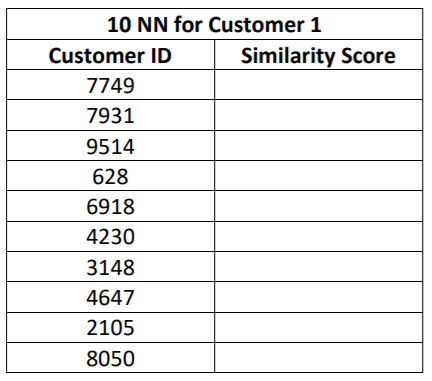

# Answer 3: Function named 'top10
###### Customer ID = Index + 1

In [160]:
# HERE WE ENTER **CUSTOMER**: so INDEX + 1
def NN(a):
    scores = {}
    ind = a - 1
    for i in range(0,9999):
        cust = i + 1
        val = ComboScores(ind,i)
        scores.update( {'{} vs {}'.format(a, cust) : val} )
    return scores

In [159]:
custtoexamine = [73, 563, 1603, 2200, 3703, 4263, 5300, 6129, 7800, 8555]
results = pd.DataFrame()
for cust in custtoexamine:
    dice = NN(cust)
    data = pd.DataFrame(dice.items())
    results = results.append(data)
results

,0,1
0,73 vs 1,0.437150
1,73 vs 2,0.474582
2,73 vs 3,0.583649
3,73 vs 4,0.562342
4,73 vs 5,0.315304
...,...,...
9994,8555 vs 9995,0.075590
9995,8555 vs 9996,0.269798
9996,8555 vs 9997,0.256889
9997,8555 vs 9998,0.251295


In [160]:
results.to_csv('results.csv', index=False) # saving so I don't have to run this again :)

## Pull the data that we've saved from running the script above

In [6]:
results = pd.read_csv('results.csv')
results.columns = ['0','1']
results[['Customer','Compared to']] = results['0'].str.split(" vs ",expand=True)
top10 = results.sort_values(['1']).groupby('Customer').head(10)
top10.columns = ['Title','Dissimilarity Score','Customer','Compared To']
top10

,Title,Dissimilarity Score,Customer,Compared To
38515,2200 vs 8519,-0.175998,2200,8519
22418,1603 vs 2421,-0.153512,1603,2421
35120,2200 vs 5124,-0.151811,2200,5124
31520,2200 vs 1524,-0.147755,2200,1524
32707,2200 vs 2711,-0.138357,2200,2711
...,...,...,...,...
68386,5300 vs 8393,0.122780,5300,8393
67450,5300 vs 7457,0.124607,5300,7457
62679,5300 vs 2686,0.124811,5300,2686
62549,5300 vs 2556,0.125165,5300,2556


In [7]:
top10.to_csv('Top10.csv', index=False)

## Final Top10 Function

In [161]:
# HERE WE ENTER **CUSTOMER**: so INDEX + 1
def Top10(a):
    scores = {}
    ind = a - 1
    for i in range(0,9999):
        cust = i + 1
        val = ComboScores(ind,i)
        scores.update( {'{} vs {}'.format(a, cust) : val} )
    data = pd.DataFrame(scores.items())
    data.columns = ['0','1']
    data[['Customer','Compared to']] = data['0'].str.split(" vs ",expand=True)
    data = data.sort_values(['1']).groupby('Customer').head(10)
    data.columns = ['Title','Dissimilarity Score','Customer','Compared To']
    print('10 NN for Customer ',a)
    return data

In [78]:
Top10(64)

10 NN for Customer  64


,Title,Dissimilarity Score,Customer,Compared To
2309,64 vs 2310,-0.128020,64,2310
2663,64 vs 2664,-0.123349,64,2664
427,64 vs 428,-0.123096,64,428
6601,64 vs 6602,-0.116616,64,6602
8470,64 vs 8471,-0.114823,64,8471
3367,64 vs 3368,-0.111752,64,3368
7494,64 vs 7495,-0.108706,64,7495
4939,64 vs 4940,-0.107029,64,4940
3420,64 vs 3421,-0.101343,64,3421
623,64 vs 624,-0.099670,64,624


# 4) Customer rating prediction
For this assignment you will implement a classification algorithm which, for a given
customer, will predict his rating (poor, fair, good, very good, excellent) for the
supermarket. In order to implement the classification for a given customer you need
to:

1) Calculate the similarities between the given customer and all other customers and compute his 10-nn (most similar) customers. IMPORTANT: In the similarity calculations for this step you need to exclude the customer rating attribute.

2) Based only on the 10 most similar customers computed in the previous step, predict the customer rating using:
* The average rating of the 10 most similar customers (rounded to the nearest integer).
* The weighted average rating of the 10 most similar customers (rounded to the nearest integer).
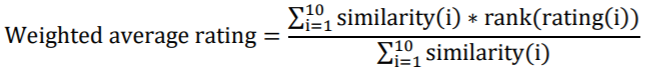

Where:
* rating(i) = the rating of the i-th nearest neighbor (i=1 for the most similar customer)
* similarity(i) = the similarity of the i-th nearest neighbor with the given customer

3) For the evaluation of your classification algorithm you will use the 50 first records of the groceries dataset and predict the rating for them. Then, for all n=50 records calculate the Mean Prediction Error for both prediction methods.
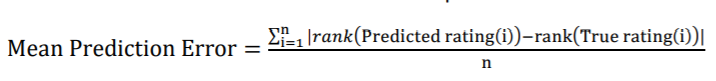

In [28]:
# same as ComboScores but without Customer Ranking
def NonCRScores(a,b):
    sumry = SexComparison(a,b) + MarriageComparison(a,b) + OccupationComparison(a,b) + EducationComparison(a,b) + AgeComparison(a,b) + IncomeComparison(a,b) + PplInHouseComparison(a,b) + GroceriesComparison(a,b)
    return sumry / 8

In [181]:
# HERE WE ENTER **CUSTOMER**: so INDEX + 1
def RankPrediction(a):
    scores = {}
    ind = a - 1
    for i in range(0,9999):
        cust = i + 1
        val = NonCRScores(ind,i)
        scores.update( {'{} vs {}'.format(a, cust) : val} )
    data = pd.DataFrame(scores.items())
    data.columns = ['0','1']
    data[['Customer','Compared to']] = data['0'].str.split(" vs ",expand=True)
    data = data.sort_values(['1']).groupby('Customer').head(10)
    data.columns = ['Title','Dissimilarity Score','Customer','Compared To']
    data = data.reset_index()
    
    crnks = []
    for i in range(0,len(data)):
        cust = data['Compared To'][i]
        ind = int(cust)
        rnk = df['Customer_Rating'][ind]
        crnks.append(rnk)
    crnks = list((pd.Series(crnks)).map(crdcit))
    data['Cust Ranking'] = crnks
    
    ns = []
    ds = []
    for i in range(0,len(test64)):
        n = data['Dissimilarity Score'][i] * (data['Cust Ranking'][i])
        ns.append(n)
        d = data['Dissimilarity Score'][i] 
        ds.append(d)
    wavg = sum(ns)/sum(ds)
    wavg = int(round(wavg,0))
    
    return wavg

In [182]:
RankPrediction(64)

4

In [164]:
test64 = Top10CR(64)
test64

,index,Title,Dissimilarity Score,Customer,Compared To
0,63,64 vs 64,0.000000,64,64
1,7009,64 vs 7010,0.104211,64,7010
2,7628,64 vs 7629,0.115029,64,7629
3,6796,64 vs 6797,0.116643,64,6797
4,984,64 vs 985,0.118703,64,985
5,2213,64 vs 2214,0.119322,64,2214
6,5649,64 vs 5650,0.122664,64,5650
7,4572,64 vs 4573,0.122847,64,4573
8,2668,64 vs 2669,0.124804,64,2669
9,3130,64 vs 3131,0.130712,64,3131


In [165]:
test64 = test64.reset_index()
test64

,level_0,index,Title,Dissimilarity Score,Customer,Compared To
0,0,63,64 vs 64,0.000000,64,64
1,1,7009,64 vs 7010,0.104211,64,7010
2,2,7628,64 vs 7629,0.115029,64,7629
3,3,6796,64 vs 6797,0.116643,64,6797
4,4,984,64 vs 985,0.118703,64,985
5,5,2213,64 vs 2214,0.119322,64,2214
6,6,5649,64 vs 5650,0.122664,64,5650
7,7,4572,64 vs 4573,0.122847,64,4573
8,8,2668,64 vs 2669,0.124804,64,2669
9,9,3130,64 vs 3131,0.130712,64,3131


In [166]:
crnks = []
for i in range(0,len(test64)):
    cust = test64['Compared To'][i]
    ind = int(cust)
    rnk = df['Customer_Rating'][ind]
    crnks.append(rnk)
crnks = list((pd.Series(crnks)).map(crdcit))
test64['Cust Ranking'] = crnks
test64

,level_0,index,Title,Dissimilarity Score,Customer,Compared To,Cust Ranking
0,0,63,64 vs 64,0.000000,64,64,2
1,1,7009,64 vs 7010,0.104211,64,7010,4
2,2,7628,64 vs 7629,0.115029,64,7629,5
3,3,6796,64 vs 6797,0.116643,64,6797,3
4,4,984,64 vs 985,0.118703,64,985,2
5,5,2213,64 vs 2214,0.119322,64,2214,1
6,6,5649,64 vs 5650,0.122664,64,5650,3
7,7,4572,64 vs 4573,0.122847,64,4573,5
8,8,2668,64 vs 2669,0.124804,64,2669,5
9,9,3130,64 vs 3131,0.130712,64,3131,4


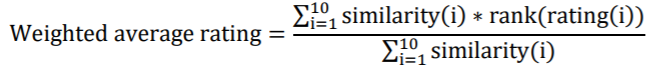

In [178]:
ns = []
ds = []
for i in range(0,len(test64)):
    n = test64['Dissimilarity Score'][i] * (test64['Cust Ranking'][i])
    ns.append(n)
    d = test64['Dissimilarity Score'][i] 
    ds.append(d)
wavg = sum(ns)/sum(ds)
wavg = int(round(wavg,0))
wavg

4

In [111]:
df['Customer_Rating'][63] #2

'fair'

# Evaluation

In [189]:
rand5 = df.sample(5)
cust5 = rand5['Customer_ID']

In [190]:
cust5

2203    2204
7604    7605
9396    9397
1124    1125
639      640
Name: Customer_ID, dtype: object

In [192]:
predz= []
for cust in cust5:
    pred = RankPrediction(int(cust))
    predz.append(pred)
rand5['Prediction'] = predz
rand5

,Customer_ID,Age,Sex,Marital_Status,Education,Income,Customer_Rating,Persons_in_Household,Occupation,Groceries,Prediction
2203,2204,27,female,married,tertiary,38000,very_good,3,entrepreneur,"root vegetables,herbs,frozen vegetables,bottle...",3
7604,7605,55,female,divorced,tertiary,24000,very_good,1,entrepreneur,"UHT-milk,rolls/buns",3
9396,9397,54,female,married,primary,38000,very_good,5,blue-collar,cream cheese,3
1124,1125,61,female,single,primary,48000,fair,1,housemaid,rolls/buns,3
639,640,38,female,single,secondary,42000,very_good,1,housemaid,canned beer,2


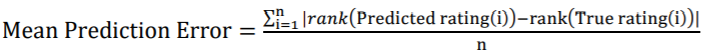

In [193]:
rting = rand5['Customer_Rating']

In [195]:
crdcit = {'poor':1, 'fair':2, 'good':3,'very_good':4,'excellent':5}
decoded = list((pd.Series(rting)).map(crdcit))
decoded

[4, 4, 4, 2, 4]

In [196]:
rand5['Num Rating'] = decoded

In [203]:
rand5 = rand5.reset_index()

In [205]:
ns = []
for i in range(0,len(rand5)):
    n = int(rand5['Prediction'][i]) - int(rand5['Num Rating'][i])
    ns.append(n)
mpe = sum(ns) / len(rand5)
mpe

-0.8

# 4 ANSREW BOTH AVG and WAVG

 Avg

In [33]:
# HERE WE ENTER **CUSTOMER**: so INDEX + 1
def AvgRankPrediction(a):
    scores = {}
    ind = a - 1
    for i in range(0,9999):
        cust = i + 1
        val = NonCRScores(ind,i)
        scores.update( {'{} vs {}'.format(a, cust) : val} )
    data = pd.DataFrame(scores.items())
    data.columns = ['0','1']
    data[['Customer','Compared to']] = data['0'].str.split(" vs ",expand=True)
    data = data.sort_values(['1']).groupby('Customer').head(10)
    data.columns = ['Title','Dissimilarity Score','Customer','Compared To']
    data = data.reset_index()
    
    crnks = []
    for i in range(0,len(data)):
        cust = data['Compared To'][i]
        ind = int(cust)
        rnk = df['Customer_Rating'][ind]
        crnks.append(rnk)
    crnks = list((pd.Series(crnks)).map(crdcit))

    avg = sum(crnks)/len(crnks)
    avg = int(round(avg,0))
    
    return avg

In [37]:
AvgRankPrediction(64)

3

In [39]:
df['Customer_Rating'][df['Customer_ID']=='64'] # fair = 2

63    fair
Name: Customer_Rating, dtype: object

Weighted average

In [34]:
# HERE WE ENTER **CUSTOMER**: so INDEX + 1
def WAvgRankPrediction(a):
    scores = {}
    ind = a - 1
    for i in range(0,9999):
        cust = i + 1
        val = NonCRScores(ind,i)
        scores.update( {'{} vs {}'.format(a, cust) : val} )
    data = pd.DataFrame(scores.items())
    data.columns = ['0','1']
    data[['Customer','Compared to']] = data['0'].str.split(" vs ",expand=True)
    data = data.sort_values(['1']).groupby('Customer').head(10)
    data.columns = ['Title','Dissimilarity Score','Customer','Compared To']
    data = data.reset_index()
    
    crnks = []
    for i in range(0,len(data)):
        cust = data['Compared To'][i]
        ind = int(cust)
        rnk = df['Customer_Rating'][ind]
        crnks.append(rnk)
    crnks = list((pd.Series(crnks)).map(crdcit))
    data['Cust Ranking'] = crnks
    
    ns = []
    ds = []
    for i in range(0,len(data)):
        n = data['Dissimilarity Score'][i] * (data['Cust Ranking'][i])
        ns.append(n)
        d = data['Dissimilarity Score'][i] 
        ds.append(d)
    wavg = sum(ns)/sum(ds)
    wavg = int(round(wavg,0))
    
    return wavg

In [38]:
WAvgRankPrediction(64)

4

In [40]:
df['Customer_Rating'][df['Customer_ID']=='64'] # fair = 2

63    fair
Name: Customer_Rating, dtype: object

In [ ]:
fiddy = df.head(50)
cust5 = fiddy['Customer_ID']
avg=[]
for cust in cust5:
    pred = AvgRankPrediction(int(cust))
    avg.append(pred)
# add a column for all predicted values
fiddy['Avg Prediction'] = avg

In [ ]:
wavg= []
for cust in cust5:
    pred = WAvgRankPrediction(int(cust))
    wavg.append(pred)
# add a column for all predicted values
fiddy['W Avg Prediction'] = wavg

In [ ]:
rting = fiddy['Customer_Rating']
crdcit = {'poor':1, 'fair':2, 'good':3,'very_good':4,'excellent':5}
decoded = list((pd.Series(rting)).map(crdcit))
fiddy['Num Rating'] = decoded
fiddy = fiddy.reset_index()

In [ ]:
ns = []
for i in range(0,len(fiddy)):
    n = int(fiddy['Avg Prediction'][i]) - int(fiddy['Num Rating'][i])
    ns.append(n)
AvgMPE = sum(ns) / len(fiddy)
AvgMPE

In [ ]:
ns = []
for i in range(0,len(fiddy)):
    n = int(fiddy['W Avg Prediction'][i]) - int(fiddy['Num Rating'][i])
    ns.append(n)
WAvgMPE = sum(ns) / len(fiddy)
WAvgMPE

## Assignment handout:
1) A report (pdf) describing in detail any processing and conversion you made to the original data and the reasons it was necessary. The report will also contain examples of how to use your script and its output to the list of customers provided at step 3 (10-NN and the corresponding similarity scores for every given id). 
Also, in your report you should describe how to use your script and its output for the classification system at step 4 (for the first 50 records of the dataset) for both prediction methods. Comment on the mean prediction error of both methods and on any other conclusions you have made. The first page of the report should clearly state the names and student ids of the members of the group. Alternatively you could provide your jupyter notebook.

2) Your code. Implementation can be done in any programming language and should be accompanied by the necessary comments and remarks.

3) The pdf and the required programs/scriptsshould be uploaded to moodle until the assignment deadline. You should create a compressed (e.g. zip/tar) file containing the report, your code and any other files required for executing your script (you do not need to include the original dataset). The name of the compressed file should include the student ids of the members of the group